In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import os
import PIL
import PIL.Image
import tensorflow as tf
from pathlib import Path
from sklearn.metrics import hamming_loss, precision_score, recall_score, f1_score
from IPython.display import display

datapath = Path('dataset')

train_df = pd.read_csv(datapath / 'train_classes.csv')
val_df = pd.read_csv(datapath / 'valid_classes.csv')
test_df = pd.read_csv(datapath / 'test_classes.csv')

No. of Training images: 2284
No. of Testing images: 322
No. of Validation images: 650


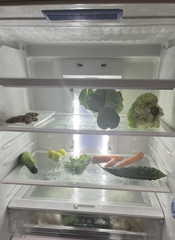

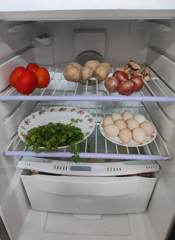

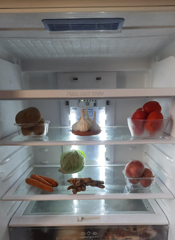

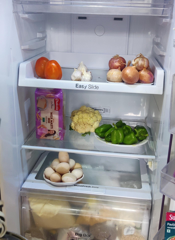

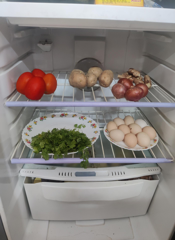

In [2]:
train_data_dir = datapath / 'train' / 'images'
test_data_dir = datapath / 'test' / 'images'
val_data_dir = datapath / 'valid' / 'images'

train_len = len(list(train_data_dir.glob('*.jpg')))
test_len = len(list(test_data_dir.glob('*.jpg')))
val_len = len(list(val_data_dir.glob('*.jpg')))
print("No. of Training images:", train_len)
print("No. of Testing images:", test_len)
print("No. of Validation images:", val_len)

images = list(train_data_dir.glob('./*.jpg'))

for i in random.sample(images, 5):
    sample_image = PIL.Image.open(i)
    # print("Sample image size:", sample_image.size)
    # Channels not displayed automatically, will need to be added manually.
    
    img = sample_image.resize((175, 240)) # Resizing so it is easier to view
    display(img)

In [3]:
def get_proportion_baselines(df, df2, df3):
    
    y_true = df.drop(columns=["filename"]).astype(int)
    
    Y_val = df2.drop(columns=["filename"]).astype(int).values 
    Y_test = df3.drop(columns=["filename"]).astype(int).values 
    
    Y = y_true.values 
    class_proportions = Y.mean(axis=0)
    
    # print("Class proportions:")
    # print(pd.Series(class_proportions, index=y_true.columns))
    
    rng = np.random.default_rng(seed=42)
    
    Y_pred = (rng.random(size=Y.shape) < class_proportions).astype(int)
    
    Y_val_pred = (rng.random(size=Y_val.shape) < class_proportions).astype(int)
    Y_test_pred = (rng.random(size=Y_test.shape) < class_proportions).astype(int)
    
    precision_micro = precision_score(Y, Y_pred, average="micro", zero_division=0)
    recall_micro = recall_score(Y, Y_pred, average="micro", zero_division=0)
    
    precision_macro = precision_score(Y, Y_pred, average="macro", zero_division=0)
    recall_macro = recall_score(Y, Y_pred, average="macro", zero_division=0)
    
    print("\n=== TRAIN - CLASS-PROPORTION BASELINE RESULTS ===")
    print(f"Micro Precision: {precision_micro:.4f}")
    print(f"Micro Recall:    {recall_micro:.4f}")
    print(f"Macro Precision: {precision_macro:.4f}")
    print(f"Macro Recall:    {recall_macro:.4f}")

    precision_micro = precision_score(Y_val, Y_val_pred, average="micro", zero_division=0)
    recall_micro = recall_score(Y_val, Y_val_pred, average="micro", zero_division=0)
    
    precision_macro = precision_score(Y_val, Y_val_pred, average="macro", zero_division=0)
    recall_macro = recall_score(Y_val, Y_val_pred, average="macro", zero_division=0)
    
    print("\n=== VAL - CLASS-PROPORTION BASELINE RESULTS ===")
    print(f"Micro Precision: {precision_micro:.4f}")
    print(f"Micro Recall:    {recall_micro:.4f}")
    print(f"Macro Precision: {precision_macro:.4f}")
    print(f"Macro Recall:    {recall_macro:.4f}")

    precision_micro = precision_score(Y_test, Y_test_pred, average="micro", zero_division=0)
    recall_micro = recall_score(Y_test, Y_test_pred, average="micro", zero_division=0)
    
    precision_macro = precision_score(Y_test, Y_test_pred, average="macro", zero_division=0)
    recall_macro = recall_score(Y_test, Y_test_pred, average="macro", zero_division=0)
    
    print("\n=== TEST - CLASS-PROPORTION BASELINE RESULTS ===")
    print(f"Micro Precision: {precision_micro:.4f}")
    print(f"Micro Recall:    {recall_micro:.4f}")
    print(f"Macro Precision: {precision_macro:.4f}")
    print(f"Macro Recall:    {recall_macro:.4f}")

get_proportion_baselines(train_df, val_df, test_df)


=== TRAIN - CLASS-PROPORTION BASELINE RESULTS ===
Micro Precision: 0.4601
Micro Recall:    0.4573
Macro Precision: 0.3151
Macro Recall:    0.3132

=== VAL - CLASS-PROPORTION BASELINE RESULTS ===
Micro Precision: 0.4619
Micro Recall:    0.4604
Macro Precision: 0.3127
Macro Recall:    0.3123

=== TEST - CLASS-PROPORTION BASELINE RESULTS ===
Micro Precision: 0.4699
Micro Recall:    0.4656
Macro Precision: 0.3163
Macro Recall:    0.3140
